In [2]:
%%bash --bg
roscore

Starting job # 2 in a separate thread.


In [3]:
%%bash
rosbag play -l office_1.bag &>/dev/null &

In [4]:
import rospy
from std_msgs.msg import String
from sensor_msgs.msg import Image
from cv_bridge import CvBridge, CvBridgeError
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pyrosbag as prb
import time

In [5]:
rospy.init_node('listener1', anonymous=True)
bridge = CvBridge()
#player = prb.BagPlayer("office_1.bag")

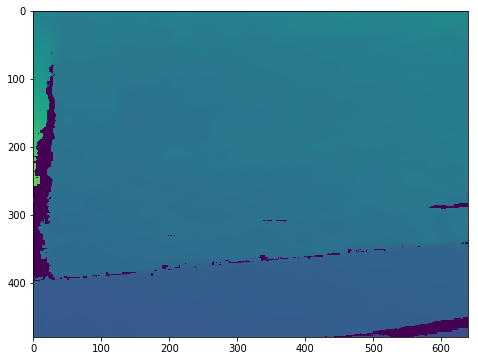

In [6]:
#player.play()
#time.sleep(1)
topic = "/camera/aligned_depth_to_color/image_raw"
data = rospy.wait_for_message(topic, Image)
#player.pause()
cv_image = bridge.imgmsg_to_cv2(data, data.encoding)
pix = (data.width/2, data.height/2)
#print('%s: Depth at center(%d, %d): %f(mm)\r' % (topic, pix[0], pix[1], cv_image[pix[1], pix[0]]))
plt.rcParams["axes.grid"] = False
plt.rcParams['figure.figsize'] = [12, 6]
plt.imshow(cv_image)

In [13]:
from pythreejs import *

ptsCoord = np.array([[-1.0, -1.0,  0.0],
                     [ 1.0, -1.0,  0.0],
                     [ 1.0,  1.0,  0.0],
                    ], dtype=np.float32)

pts = BufferAttribute(array=ptsCoord)
geometry = BufferGeometry(attributes={'position': pts})
material = PointsMaterial(color='red', size=1)
pointCloud = Points(geometry = geometry, material = material)

# --rendering----------------------
c = PerspectiveCamera(
    position=[0, 5, 5], 
    up=[0, 1, 0],
    children=[DirectionalLight(color='white', position=[3, 5, 1], intensity=0.5)])

scene = Scene(
        children=[pointCloud, c, AmbientLight(color='#777777')])

renderer = Renderer(camera=c, 
                    scene=scene, 
                    controls=[OrbitControls(controlling=c)],
                    width=640, height=480)
display(renderer)

UmVuZGVyZXIoY2FtZXJhPVBlcnNwZWN0aXZlQ2FtZXJhKGNoaWxkcmVuPShEaXJlY3Rpb25hbExpZ2h0KGNvbG9yPSd3aGl0ZScsIGludGVuc2l0eT0wLjUsIHBvc2l0aW9uPSgzLjAsIDUuMCzigKY=


In [10]:
from sensor_msgs.msg import LaserScan
from laser_geometry import LaserProjection
from sensor_msgs.msg import PointCloud2

#for p in pc2.read_points(point_cloud, field_names = ("x", "y", "z"), skip_nans=True):
#     print " x : %f  y: %f  z: %f" %(p[0],p[1],p[2])

In [9]:
%%bash
rostopic list

/camera/aligned_depth_to_color/camera_info
/camera/aligned_depth_to_color/image_raw
/camera/color/camera_info
/camera/color/image_raw
/camera/imu
/clock
/rosout
/rosout_agg
/rtabmap/cloud_ground
/rtabmap/cloud_map
/rtabmap/cloud_obstacles
/rtabmap/global_path
/rtabmap/goal
/rtabmap/goal_node
/rtabmap/goal_out
/rtabmap/goal_reached
/rtabmap/grid_map
/rtabmap/grid_prob_map
/rtabmap/info
/rtabmap/initialpose
/rtabmap/labels
/rtabmap/local_path
/rtabmap/localization_pose
/rtabmap/mapData
/rtabmap/mapGraph
/rtabmap/mapPath
/rtabmap/move_base/cancel
/rtabmap/move_base/feedback
/rtabmap/move_base/goal
/rtabmap/move_base/result
/rtabmap/move_base/status
/rtabmap/octomap_binary
/rtabmap/octomap_empty_space
/rtabmap/octomap_full
/rtabmap/octomap_grid
/rtabmap/octomap_ground
/rtabmap/octomap_obstacles
/rtabmap/octomap_occupied_space
/rtabmap/odom
/rtabmap/odom_info
/rtabmap/odom_last_frame
/rtabmap/odom_local_map
/rtabmap/odom_local_scan_map
/rtabmap/proj_map
/rtabmap/scan_map
/tf
/tf_static


In [7]:
%%bash --bg
roslaunch rtabmap_ros rtabmap.launch args:=--delete_db_on_start rgb_topic:=/camera/color/image_raw depth_topic:=/camera/aligned_depth_to_color/image_raw camera_info_topic:=/camera/color/camera_info depth_camera_info_topic:=/camera/depth/camera_info rtabmapviz:=false rviz:=false

Starting job # 3 in a separate thread.


In [11]:
topic = "/rtabmap/cloud_map"
data = rospy.wait_for_message(topic, PointCloud2)

In [12]:
data

header: 
  seq: 0
  stamp: 
    secs: 1543996404
    nsecs: 563339472
  frame_id: "map"
height: 1
width: 1123
fields: 
  - 
    name: "x"
    offset: 0
    datatype: 7
    count: 1
  - 
    name: "y"
    offset: 4
    datatype: 7
    count: 1
  - 
    name: "z"
    offset: 8
    datatype: 7
    count: 1
  - 
    name: "rgb"
    offset: 16
    datatype: 7
    count: 1
is_bigendian: False
point_step: 32
row_step: 35936
data: [172, 23, 82, 63, 176, 148, 146, 62, 64, 207, 163, 187, 0, 0, 128, 63, 116, 128, 132, 0, 0, 0, 0, 0, 163, 73, 103, 86, 53, 127, 0, 0, 208, 37, 90, 63, 207, 113, 141, 62, 128, 4, 131, 186, 0, 0, 128, 63, 110, 122, 126, 0, 0, 0, 0, 0, 163, 73, 103, 86, 53, 127, 0, 0, 250, 148, 74, 63, 40, 4, 158, 190, 248, 215, 50, 61, 0, 0, 128, 63, 137, 145, 144, 0, 0, 0, 0, 0, 163, 73, 103, 86, 53, 127, 0, 0, 255, 205, 76, 63, 109, 108, 132, 190, 24, 72, 43, 61, 0, 0, 128, 63, 136, 144, 144, 0, 0, 0, 0, 0, 163, 73, 103, 86, 53, 127, 0, 0, 22, 150, 78, 63, 14, 237, 85, 190, 148, 195,

In [18]:
import sensor_msgs.point_cloud2 as pc2
from pythreejs import *

pts = []
for p in pc2.read_points(data, field_names = ("x", "y", "z"), skip_nans=True):
     pts.append([p[0] * 10,p[1] * 10,p[2] * 10])
        
ptsCoord = np.array(pts, dtype=np.float32)

pts = BufferAttribute(array=ptsCoord)
geometry = BufferGeometry(attributes={'position': pts})
material = PointsMaterial(color='red', size=1)
pointCloud = Points(geometry = geometry, material = material)

# --rendering----------------------
c = PerspectiveCamera(
    position=[0, 5, 5], 
    up=[0, 1, 0],
    children=[DirectionalLight(color='white', position=[3, 5, 1], intensity=0.5)])

scene = Scene(
        children=[pointCloud, c, AmbientLight(color='#777777')])

renderer = Renderer(camera=c, 
                    scene=scene, 
                    controls=[OrbitControls(controlling=c)],
                    width=640, height=480)
display(renderer)

UmVuZGVyZXIoY2FtZXJhPVBlcnNwZWN0aXZlQ2FtZXJhKGNoaWxkcmVuPShEaXJlY3Rpb25hbExpZ2h0KGNvbG9yPSd3aGl0ZScsIGludGVuc2l0eT0wLjUsIHBvc2l0aW9uPSgzLjAsIDUuMCzigKY=
